<a href="https://colab.research.google.com/github/mattselph/ml-notebooks/blob/master/4_ML_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *K* Nearest Neighbors (KNN)
*K* Nearest Neighbors (KNN) is an algorithm that can be used in either classification or regression.  It works by polling the nearest values (neighbors) of a point to ascertain what category the point is in.  The *K* variable is how many neighbors it will poll to determine the category.

## Explanation
In the scatter plot below, which class would the star point belong to?  
![knn_scatter](https://www.edureka.co/blog/wp-content/uploads/2018/07/KNN-Algorithm-k3-edureka-437x300.png)  

It could belong to either the blue or the orange class.  It depends on the value you give K.  If you give it K=3, then it will find the closest 3 neighbors and figure out what the majority is (2 orange, 1 blue, so it belongs to orange).  

If you give it K=5, it will likely circle the two orange and one blue like it has already, but then circle the two blue dots that are close to the existing circle.  In that case, it would classify it as a blue dot.

# Data
Use the [Halloween candy dataset](https://raw.githubusercontent.com/mattselph/datasets/master/candy-data.csv) that was used in the Logistic Regression notebook to see if there's a more accurate result.

# Question to Answer
Using the percentage of sugar and the cost, can you determine if the candy has chocolate in it?

## Preprocessing

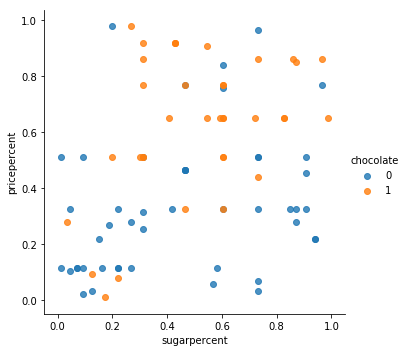

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/mattselph/datasets/master/candy-data.csv')
candy = df[['sugarpercent', 'pricepercent', 'chocolate']]

X = candy[['sugarpercent', 'pricepercent']]
y = candy['chocolate']

# scatter plot
sns.lmplot('sugarpercent', 'pricepercent', data=candy, hue='chocolate', fit_reg=False)
plt.show()

So KNN is going to try and classify points using their nearest neighbor.  When it encounters a new variable, it will look at the closest *k* neighbors and figure out which class it belongs in based on that.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

## Train the Model
Use ```sklearn.neighbors.KNeighborsClassifier``` for this algorithm.  By default, it uses a *K* value of 5.  I'm going to use 3 and play with that parameter a bit just to see how it changes the result.

In [0]:
k = 9

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

## Test the Model

In [14]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0])

## Evaluate the Model

In [15]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print("Accuracy score:  %.2f" % score)

Accuracy score:  0.76


Play with the k value above to see different results.  If you run the preprocessing code again, you'll also get different results because the ```test_train_split``` function shuffles the data before splitting it.

# Conclusion
Again, you want a high accuracy score